In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [23]:
#income data
income_data = pd.read_excel('/Users/minalurooj/Downloads/Income by Country.xlsx')

#mall data
mall_data = pd.read_csv('/Users/minalurooj/Downloads/Largest-Malls.csv')

Checking if there is need for Cleaning Data

In [24]:
income_data.isnull().sum()
mall_data.isnull().sum()

Rank                         0
Mall                         0
Country                      0
City (metropolitan area)     0
Year opened                  0
Gross leasable area (GLA)    0
Shops                        0
dtype: int64

In [25]:
print("Income Data:")
print(income_data.head())

print("\nMall Data:")
print(mall_data.head())


Income Data:
       Country   1990   1991   1992   1993   1994   1995   1996   1997   1998  \
0  Afghanistan  0.466   0.44  0.431  0.376  0.328  0.381  0.366  0.354  0.343   
1      Albania  0.572  0.521  0.506  0.526  0.541  0.563  0.578  0.561  0.576   
2      Algeria  0.695  0.687  0.687  0.683  0.677  0.678  0.681  0.681  0.688   
3      Andorra  0.936  0.934  0.929  0.923  0.922  0.923  0.929  0.942  0.947   
4       Angola  0.562  0.576  0.431  0.428  0.388  0.506  0.505   0.53  0.527   

   ...   2009   2010   2011   2012   2013   2014   2015   2016   2017   2018  
0  ...  0.409  0.426  0.421  0.435  0.438  0.436  0.435  0.434  0.434  0.432  
1  ...  0.686  0.693  0.699    0.7  0.705  0.707  0.711  0.717  0.721  0.727  
2  ...  0.731  0.735  0.734  0.734  0.735  0.737  0.739  0.745  0.743  0.743  
3  ...  0.924  0.916   0.91   0.91  0.914   0.92  0.924  0.928  0.931  0.935  
4  ...  0.615  0.614  0.613  0.622  0.626   0.63  0.629   0.62  0.617  0.607  

[5 rows x 30 columns]

Ma

Visualisations Using Matplot 

Average Income Trends of Specific Cities

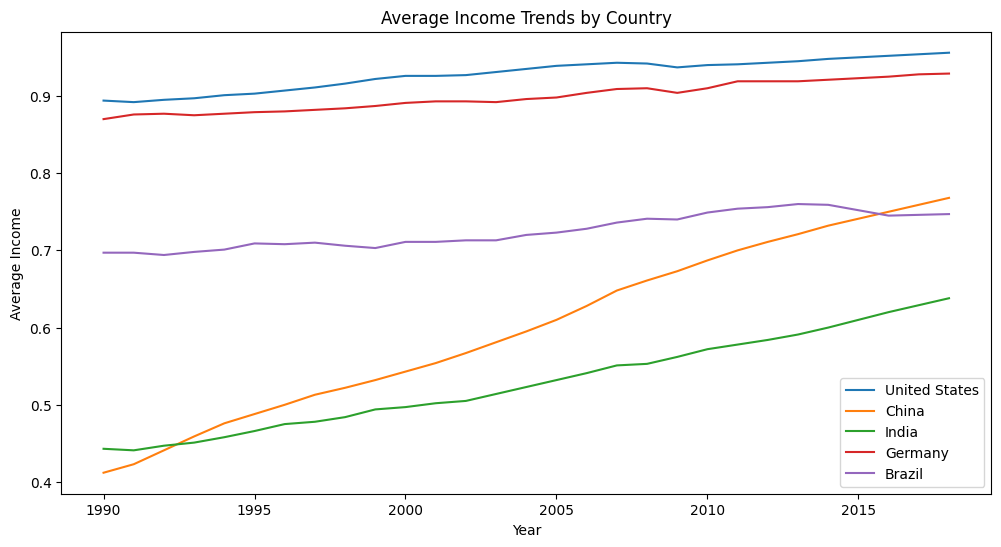

In [26]:
countries_to_plot = ['United States', 'China', 'India', 'Germany', 'Brazil']
plt.figure(figsize=(12, 6))
for country in countries_to_plot:
    plt.plot(income_data.columns[1:], income_data.loc[income_data['Country'] == country].values[0][1:], label=country)
plt.title('Average Income Trends by Country')
plt.xlabel('Year')
plt.ylabel('Average Income')
plt.legend()
plt.show()


1- Merging data of both Datasets

2- Plotting relationship between average income and number of malls

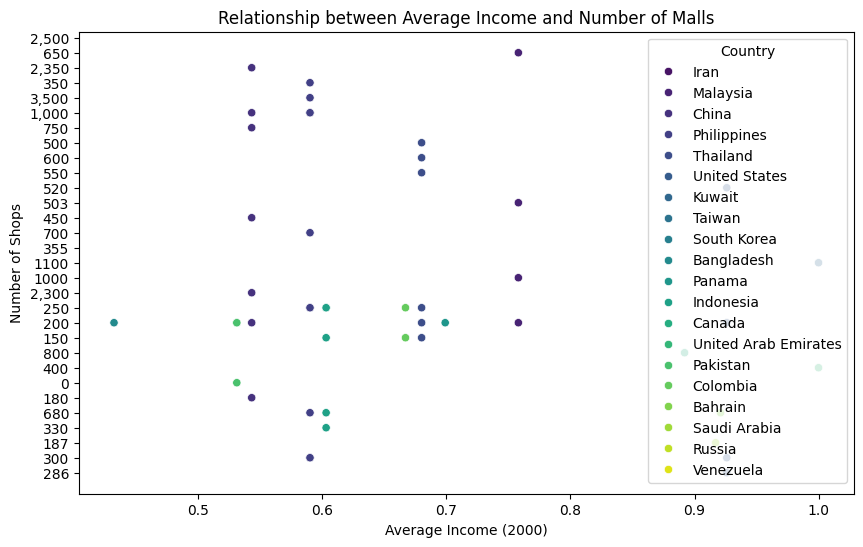

In [27]:

merged_data = pd.merge(mall_data, income_data, on='Country', how='left')


plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x=2000, y='Shops', hue='Country', palette='viridis')
plt.title('Relationship between Average Income and Number of Malls')
plt.xlabel('Average Income (2000)')
plt.ylabel('Number of Shops')
plt.show()


Visualisations Using Plotly

1- Counting the number of malls per country

2- Creating a Pie Chart

In [28]:
mall_count_by_country = mall_data['Country'].value_counts().reset_index()
mall_count_by_country.columns = ['Country', 'Number of Malls']

fig2 = px.pie(mall_count_by_country, values='Number of Malls', names='Country', title='Distribution of Malls by Country')
fig2.show()


1- Counting the number of malls opened each year

2- Creating a line plot

In [29]:

yearly_mall_count = mall_data['Year opened'].value_counts().sort_index().reset_index()
yearly_mall_count.columns = ['Year', 'Number of Malls']

fig3 = px.line(yearly_mall_count, x='Year', y='Number of Malls', title='Yearly Growth of Malls')
fig3.show()


1- Counting the number of malls per city

2- Creating a horizontal bar plot

In [30]:

mall_count_by_city = mall_data['City (metropolitan area)'].value_counts().head(10).reset_index()
mall_count_by_city.columns = ['City', 'Number of Malls']

fig4 = px.bar(mall_count_by_city, x='Number of Malls', y='City', orientation='h', title='Cities with the Most Malls')
fig4.show()
